<a href="https://colab.research.google.com/github/Alphaskakuko/ADS-Assignment-2-3/blob/main/digits_recognition_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

In [1]:
import tensorflow

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
X_train[0].shape

(28, 28)

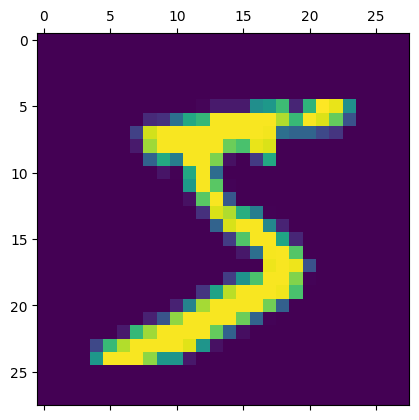

In [9]:
plt.matshow(X_train[0])

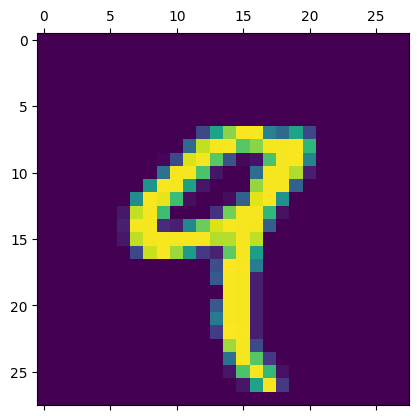

In [10]:
plt.matshow(X_train[4])

In [11]:
y_train[0]

5

In [12]:
X_train = X_train / 255
X_test = X_test / 255

In [13]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [15]:
X_train_flattened.shape

(60000, 784)

In [16]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<h3 style='color:purple'>Very simple neural network with no hidden layers</h3>

<img src="https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/1_digits_recognition/digits_nn.jpg?raw=1" />

In [17]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 2ms/step - loss: 0.4676 - accuracy: 0.8788
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3036 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2828 - accuracy: 0.9215
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2731 - accuracy: 0.9229
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2664 - accuracy: 0.9255


In [18]:
y_pred=model.predict(X_test_flattened)
y_pred.shape

313/313 [==============================] - 1s 1ms/step


(10000, 10)

In [19]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2726 - accuracy: 0.9243


[0.27261167764663696, 0.9243000149726868]

In [20]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([2.2795184e-02, 5.6296113e-07, 6.0257003e-02, 9.7410113e-01,
       1.9979891e-03, 1.1766625e-01, 1.1476976e-06, 9.9979144e-01,
       1.2323429e-01, 7.1950752e-01], dtype=float32)

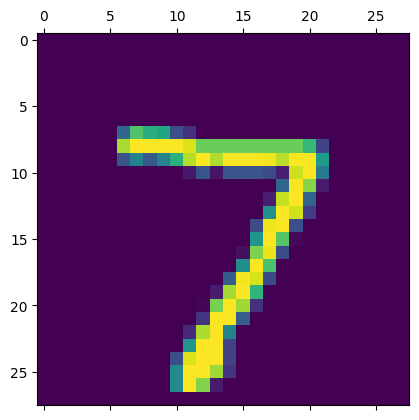

In [21]:
plt.matshow(X_test[0])

**np.argmax finds a maximum element  from an array and returns the index of it**

In [22]:
np.argmax(y_predicted[0])

7

In [23]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [24]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [25]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    2,    0,    4,    5,    2,    1,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [  10,   12,  898,   22,    9,    2,   13,   12,   52,    2],
       [   2,    0,    9,  939,    0,   17,    3,   11,   22,    7],
       [   1,    1,    3,    2,  916,    0,   11,    4,   10,   34],
       [  10,    3,    1,   45,   10,  754,   17,    8,   38,    6],
       [  11,    3,    4,    1,    8,    8,  917,    2,    4,    0],
       [   1,    5,   20,    8,    5,    0,    0,  953,    3,   33],
       [   7,    8,    5,   27,    9,   21,    7,   10,  874,    6],
       [  11,    7,    1,   14,   29,    5,    0,   21,    8,  913]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

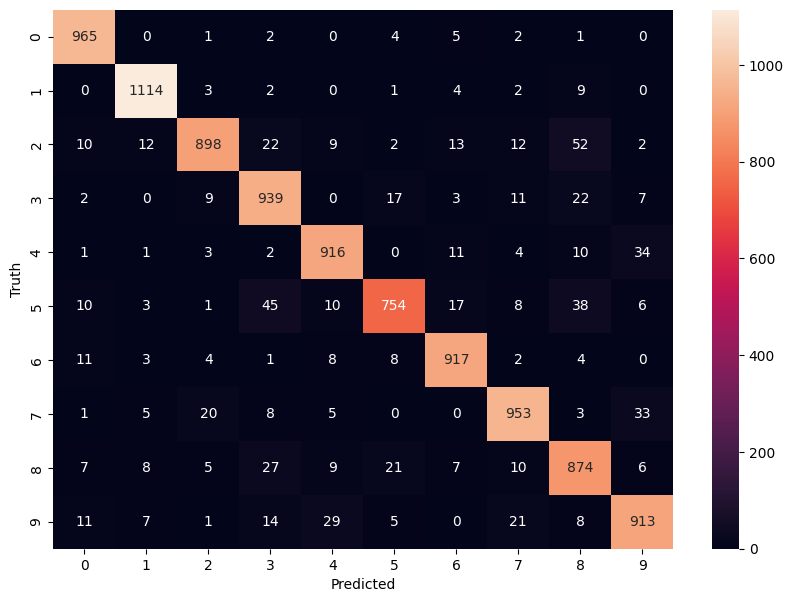

In [26]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using hidden layer</h3>

In [28]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2656 - accuracy: 0.9243
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1209 - accuracy: 0.9643
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0843 - accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0647 - accuracy: 0.9797
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0516 - accuracy: 0.9844
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0416 - accuracy: 0.9878
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0329 - accuracy: 0.9895
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0273 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0232 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.019

In [30]:
y_pred=model.predict(X_test_flattened)
y_pred_final=[np.argmax(i) for i in y_predicted]

313/313 [==============================] - 0s 2ms/step


In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0966 - accuracy: 0.9716


[0.09658893942832947, 0.9715999960899353]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

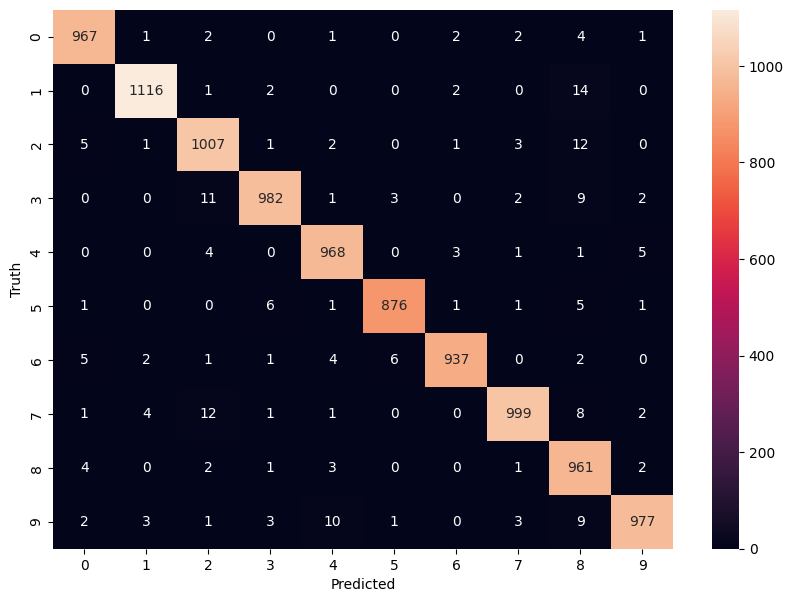

In [31]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2739 - accuracy: 0.9228
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1268 - accuracy: 0.9632
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0881 - accuracy: 0.9732
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0659 - accuracy: 0.9800
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0519 - accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0422 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0342 - accuracy: 0.9897
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0282 - accuracy: 0.9910
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0227 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.018